In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
housing = fetch_california_housing()
df= pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

In [8]:
print("First 5 rows of the dataset: ")
print(df.head())

First 5 rows of the dataset: 
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [9]:
x=df.drop('Price',axis=1)
y=df['Price']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [12]:
model= LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(x_test)

In [27]:
MAE = mean_squared_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R-squared:", R2)

Mean Absolute Error: 0.5558915986952444
Mean Squared Error: 0.5558915986952444
Root Mean Squared Error: 0.7455813830127764
R-squared: 0.5757877060324508


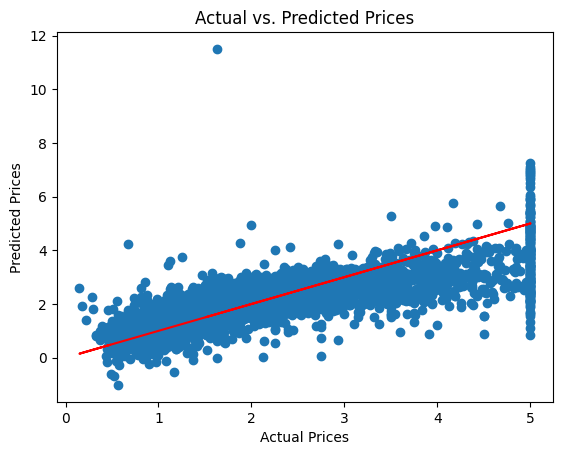

In [29]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot(y_test, y_test, color='red')
plt.show()

In [32]:
sample_house= [[8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]]

sample_df= pd.DataFrame(sample_house, columns=x.columns)

sample_scaled= scaler.transform(sample_df)
predicted_price = model.predict(sample_scaled)
print(f"Predicted price for the sample house:",predicted_price[0])

Predicted price for the sample house: -36.04503172054377


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
print("coefficients")
print(model.coef_)

coefficients
[ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]
